In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.metrics import classification_report

In [2]:
# Load data set that excluded some unimportant features
data_df = pd.read_csv('rearranged_optimal_data_set.csv')

In [3]:
# Split the data
np.random.seed(101)
data = np.random.permutation(data_df)
train, validate, test = np.split(data, [int(.7*len(data)), int(.9*len(data))])

X_train = train[:, :-1]
Y_train = train[:, -1]
X_test = validate[:, :-1]
Y_test = validate[:, -1]
X_final = test[:, :-1]
Y_final = test[:, -1]

print(X_train.shape)
print(X_test.shape)
print(X_final.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_final.shape)

(28831, 35)
(8238, 35)
(4119, 35)
(28831,)
(8238,)
(4119,)


In [18]:
# Use GridSearchCV to tune hyperparameters
parameters = {'max_depth':[1, 5, 10, 100], 'min_samples_leaf':[30, 40, 50, 60]}
clf = tree.DecisionTreeClassifier() #tried class weight balanced but results in lower f1 score, so kept it not balanced here
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_estimator_, grid.best_params_, grid.best_score_

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=50,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 {'max_depth': 10, 'min_samples_leaf': 50},
 0.91536887378169329)

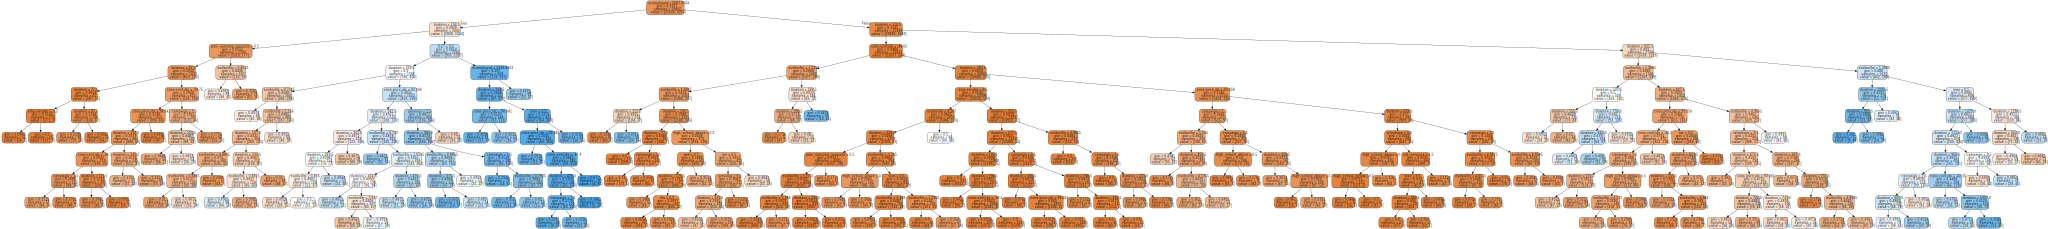

In [20]:
# Train and plot the decision tree
clf1 = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=50)
fitted_tree = clf1.fit(X_train, Y_train)
dot_data = tree.export_graphviz(fitted_tree, out_file=None, 
                         feature_names=data_df.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [21]:
# Print classification report
print(classification_report(y_true=Y_test, y_pred=clf1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.94      0.96      0.95      7280
        yes       0.65      0.50      0.56       958

avg / total       0.90      0.91      0.91      8238



In [22]:
# Load the whole data set
data_df2 = pd.read_csv('rearranged_whole_data_set.csv')

In [23]:
# Split the data set
np.random.seed(101)
data = np.random.permutation(data_df2)
train, validate, test = np.split(data, [int(.7*len(data)), int(.9*len(data))])

X_train = train[:, :-1]
Y_train = train[:, -1]
X_test = validate[:, :-1]
Y_test = validate[:, -1]
X_final = test[:, :-1]
Y_final = test[:, -1]

print(X_train.shape)
print(X_test.shape)
print(X_final.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_final.shape)

(28831, 45)
(8238, 45)
(4119, 45)
(28831,)
(8238,)
(4119,)


In [24]:
# Use GridSearchCV to tune hyperparameters
grid2 = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid2.fit(X_train, Y_train)
grid2.best_estimator_, grid2.best_params_, grid2.best_score_

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=50,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 {'max_depth': 5, 'min_samples_leaf': 50},
 0.91481391557698311)

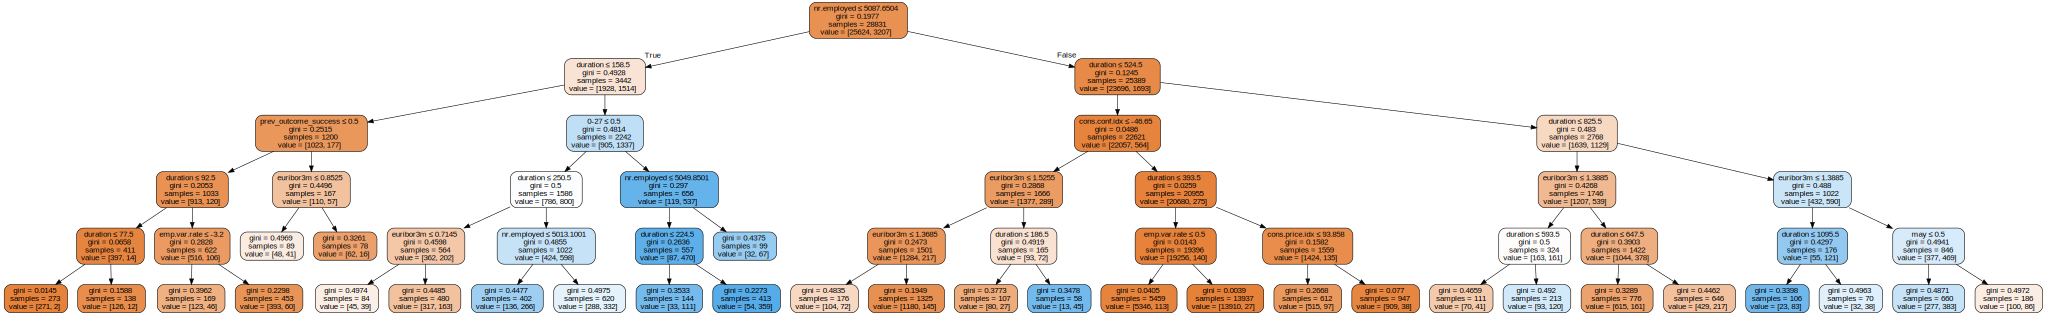

In [25]:
# Train and plot the decision tree
clf2 = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)
fitted_tree2 = clf2.fit(X_train, Y_train)
dot_data2 = tree.export_graphviz(fitted_tree2, out_file=None, 
                         feature_names=data_df2.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph2 = graphviz.Source(dot_data2)  
graph2

In [26]:
# Print classification report for test data
print(classification_report(y_true=Y_test, y_pred=clf2.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.94      0.96      0.95      7280
        yes       0.65      0.53      0.59       958

avg / total       0.91      0.91      0.91      8238



In [48]:
# Print classification report for training data
print(classification_report(y_true=Y_train, y_pred=clf2.predict(X_train), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.95      0.96      0.95     25624
        yes       0.65      0.56      0.60      3207

avg / total       0.91      0.92      0.91     28831



#### From the classification reports above, using the dataset with all features results in a better f1 score for "yes" output than using the dataset the excluded some low logistic regression coefficient features. 

## Random Forest Training with All Features Included Dataset:

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
# Tuning criterion parameter
parameters = {'max_features':['auto', 20, 30, 40], 'max_depth':[5, 10, 50], 'n_estimators':[10, 100, 150]}
clf = RandomForestClassifier(random_state=99, n_jobs=-1) # n_jobs=-1 allows to use all cores in CPU for parallel computing
grid = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_estimator_, grid.best_params_, grid.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=10, max_features=20, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_jobs=-1, oob_score=False, random_state=99,
             verbose=0, warm_start=False),
 {'max_depth': 10, 'max_features': 20, 'n_estimators': 100},
 0.91807429502965554)

In [63]:
# Train the random forest model with best parameters values
clf_forest = RandomForestClassifier(max_features=20, n_estimators=100, max_depth=10, random_state=99, n_jobs=-1)
clf_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=20, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=99,
            verbose=0, warm_start=False)

In [64]:
# Classification report for test data
print(classification_report(y_true=Y_test, y_pred=clf_forest.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.94      0.97      0.95      7280
        yes       0.66      0.51      0.58       958

avg / total       0.91      0.91      0.91      8238



In [65]:
# Classification report for training data
print(classification_report(y_true=Y_train, y_pred=clf_forest.predict(X_train), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.96      0.98      0.97     25624
        yes       0.84      0.69      0.76      3207

avg / total       0.95      0.95      0.95     28831



#### From the classification reports of random forest for training and test data above, random forest is a little bit overfitting, which could be the reason for that it results in a 1% lower f1 score for "yes" than a single decision tree's. 